## FEC Campaign Finance: 

### Contributions from committees to candidates & independent expenditures

In [1]:
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from copy import deepcopy
from matplotlib import font_manager as fm, rcParams
from matplotlib.lines import Line2D
from matplotlib.offsetbox import (
    AnnotationBbox,
    OffsetImage, 
)

%matplotlib inline

In [2]:
gave = pd.read_csv('data/04a_committee_stats.csv')
mask = [True if ('comm2__' in x) else False for x in gave['name']]
gave2 = gave[mask]
gave2.index = list(gave2['name'].values)

# this is the one concatenated in 04bi!  do not use 04a
cand = pd.read_csv('data/04bi_cand_cleaned.csv')
cands = list(set(cand['cand_id']))
cols = [x for x in list(gave2.columns) if x in cands]
cols.extend(['total', 'count', 'distinct', 'entity_tps'])
gave2 = gave2[['name'] + cols]
print(len(gave2))
gave2.head(2)

1528


,name,H0AL02087,H0AL05163,H0AL07086,H0AR01083,H0AR03055,H0AZ01259,H0CA03078,H0CA10073,H0CA10149,...,S8VT00141,S8WA00194,S8WA00319,S8WI00224,S8WV00143,S8WY00189,total,count,distinct,entity_tps
comm2__HELLER FOR SENATE (nonaffiliated),comm2__HELLER FOR SENATE (nonaffiliated),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3436419,1590,1,"[nan, 'enttp_Organization (not a committee and..."
comm2__KEVIN MCCARTHY FOR CONGRESS (nonaffiliated),comm2__KEVIN MCCARTHY FOR CONGRESS (nonaffilia...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3267550,1099,1,"[nan, 'enttp_Organization (not a committee and..."


In [3]:
# remove cand_ids with no corresponding in-kind contributions or nonaffiliated contributions
for col in gave2.columns:
    if gave2[col].sum() == 0:
        gave2.drop([col], axis = 1, inplace = True)
        print(col)

H0OR04081
H2FL20043
H4KS01059
H4MN08091
H4WA07073
H6CA03067
H6CA44145
H6FL09195
H6FL23063
H6IL11133
H6MD03292
H6ME01207
H6MN04236
H6MO05189
H6OH11160
H6TN08250
H6TX15204
H8AL01066
H8AL04094
H8AZ03159
H8AZ04140
H8AZ05154
H8CA08120
H8CA09144
H8CA12270
H8CA13096
H8CA15117
H8CA35115
H8CA37293
H8CA41170
H8CA44117
H8CA47078
H8CA51062
H8CO01162
H8CO02251
H8CO07094
H8CT04214
H8CT05187
H8FL03038
H8FL04085
H8FL05157
H8FL08102
H8FL19067
H8GA02087
H8GU01020
H8GU01046
H8IL10115
H8LA01122
H8LA01130
H8LA03037
H8MA02116
H8MA09046
H8MD02118
H8MD05152
H8MI03079
H8MI10108
H8MN05213
H8MN06096
H8MO03198
H8MO06092
H8MO07223
H8MO08098
H8MS01145
H8MS04438
H8NC01104
H8NH02275
H8NJ02232
H8NJ05136
H8NJ07256
H8NJ08080
H8NJ10110
H8NM01448
H8NV02095
H8NY03151
H8NY09174
H8NY10099
H8NY27150
H8OH08097
H8OH13147
H8OK01173
H8OK02148
H8OR05198
H8SC02106
H8SC04391
H8SC07063
H8SD01097
H8TN01079
H8TN02176
H8TN03208
H8TN07068
H8TN09114
H8TX09138
H8TX16133
H8TX29094
H8TX33021
H8UT01125
H8UT01133
H8UT02255
H8UT03402
H8VA08159


In [4]:
# which cand_ids appear the most frequently
counts = gave2.drop([
    'name', 
    'total', 
    'count', 
    'distinct', 
    'entity_tps',

], axis = 1)

for col in counts.columns:
    counts[col] = [1 if x > 0 else 0 for x in counts[col]]
    
print(len(counts.columns))
counts = counts.sum().sort_values(ascending = False)
counts[:20]

716


H0NH02181    22
H8CA25074    19
H2CA52089    19
H2IL10068    19
H2IL17071    18
H8MI08102    18
H0CA03078    18
H8CA45130    18
H6FL13205    17
H8VA10106    17
H8CA49058    17
H2NY22139    16
H6NJ05171    16
H8VA07094    16
H8IA01094    15
H6IL06117    15
H6FL07140    15
H2CA36439    14
H8NC13067    14
S8FL00166    14
dtype: int64

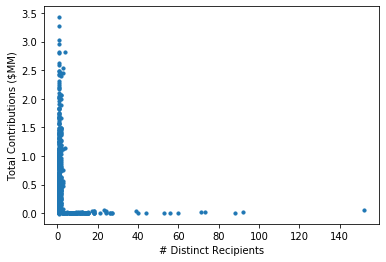

In [5]:
plt.figure()

plt.scatter(
    gave2['distinct'], 
    gave2['total']/1.0E6, 
    s = 10,
)
plt.xlabel('# Distinct Recipients')
plt.ylabel('Total Contributions ($MM)')
plt.show();

In [6]:
# who gave a lot to two distinct recipients?  show first 
names = list(gave2.loc[(gave2['distinct'] > 1) & (gave2['total'] > 34000), 'name'].values)

for name in names:
    lil_cand = cand.loc[cand[name] > 0, [
        'cand_pty_affiliation',
        'cand_id',
        'cand_name',
        'cand_ici',
        'contest',
        name
    ]].sort_values([name], ascending = False).reset_index(drop = True)
    
    if len(lil_cand) > 2:
        lil_cand.columns = [
            'cand_pty_affiliation',
            'cand_id',
            'cand_name',
            'cand_ici',
            'contest',
            name.replace('comm2__', ''), 
        ]
        print(name.replace('comm2__', ''))
        print(lil_cand.to_csv(None))

FRIENDS OF ERIK PAULSEN (nonaffiliated)
,cand_pty_affiliation,cand_id,cand_name,cand_ici,contest,FRIENDS OF ERIK PAULSEN (nonaffiliated)
0,Republican,H8MN03077,"PAULSEN, ERIK MR.",I,MN_03,2808215.0
1,Democrat,H6WI03099,"KIND, RONALD JAMES",I,WI_03,2500.0
2,Republican,H0CA19173,"DENHAM, JEFF",I,CA_10,2000.0
3,Republican,S8AZ00221,"MCSALLY, MARTHA",O,AZ_senate,1500.0

DONNELLY FOR INDIANA (nonaffiliated)
,cand_pty_affiliation,cand_id,cand_name,cand_ici,contest,DONNELLY FOR INDIANA (nonaffiliated)
0,Democrat,S2IN00091,"DONNELLY, JOSEPH S",I,IN_senate,2538794.0
1,Democrat,H2IL10068,"SCHNEIDER, BRADLEY SCOTT",I,IL_10,2000.0
2,Democrat,H4NJ01084,"NORCROSS, DONALD W",I,NJ_01,2000.0

GRAVES FOR CONGRESS (nonaffiliated)
,cand_pty_affiliation,cand_id,cand_name,cand_ici,contest,GRAVES FOR CONGRESS (nonaffiliated)
0,Republican,H0MO06073,"GRAVES, SAMUEL B JR 'SAM'",I,MO_06,1289020.0
1,Republican,H0GA09030,"GRAVES, JOHN THOMAS MR. JR.",I,GA_14,1159200.0
2,Republican,H4LA06153,"GRAVES, GARRET",I,LA_0

In [7]:
# one or two recipients won't help with model building; exclude
print(len(gave2))
gave2 = gave2[gave2['distinct'] > 10]
print(len(gave2))

1528
56


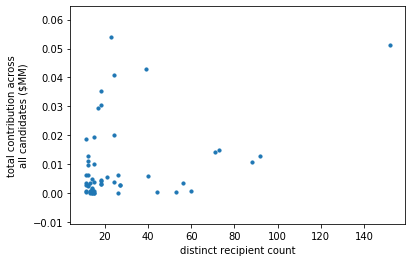

In [8]:
plt.figure()

plt.scatter(
    gave2['distinct'], 
    gave2['total']/1.0E6, 
    s = 10,
)
plt.xlabel('distinct recipient count')
plt.ylabel('total contribution across\nall candidates ($MM)')
plt.show();

In [9]:
std_tot = gave2['total'].std()
med_tot = gave2['total'].median()

std_dist = gave2['distinct'].std()
med_dist = gave2['distinct'].median()

gave2_new = gave2[
    ~((gave2['total'] < 1.*med_tot + 0.0*std_tot) & \
    (gave2['distinct'] < 1.*med_dist + 0.0*std_dist))
]

len(gave2_new)

40

In [10]:
gave2_new['distinct'].value_counts().sort_index()

11     2
12     4
14     1
15     6
17     1
18     6
21     1
23     1
24     3
26     2
27     2
39     1
40     1
44     1
53     1
56     1
60     1
71     1
73     1
88     1
92     1
152    1
Name: distinct, dtype: int64

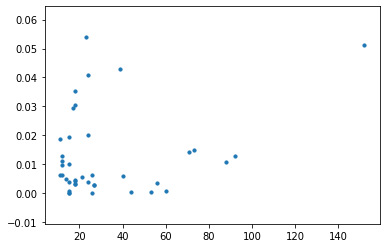

In [11]:
plt.figure()

plt.scatter(
    gave2_new['distinct'], 
    gave2_new['total']/1.0E6, 
    s = 10,
)
plt.show();

In [12]:
rows = []
for comm in list(gave2_new.index):
    lil_row = []
    lil_cand = cand[cand[comm] > 0]
    for which in ['Republican', 'Democrat', 'Third party']:    
        liller_cand = lil_cand[lil_cand['cand_pty_affiliation'] == which]
        lil_row.append(liller_cand[comm].sum())
        lil_row.append(len(liller_cand.drop_duplicates(['cand_id'], keep = 'first')))
    rows.append(lil_row)
    
rows = pd.DataFrame(
    rows, 
    columns = [
        'r_amt', 
        'r_count', 
        'd_amt', 
        'd_count',
        't_amt',
        't_count',
    ], 
    index = list(gave2_new['name'].values), 
)

rows.sort_values(['r_amt'], ascending = False, inplace = True)

rows.sort_index(inplace = True)

rows

,r_amt,r_count,d_amt,d_count,t_amt,t_count
comm2__ADVAMED (in-kind),3300.0,12,3000.0,14,0.0,0
comm2__AL ADVISING (nonaffiliated),0.0,0,4969.0,14,0.0,0
comm2__AMERICAN EXPRESS (in-kind),7856.0,8,5112.0,4,0.0,0
comm2__AUERBACH LEOR (in-kind),8500.0,5,22100.0,13,0.0,0
comm2__AUERBACH LEOR (nonaffiliated),5100.0,3,13600.0,8,0.0,0
comm2__BUSINESS WIRE (nonaffiliated),10703.0,88,0.0,0,0.0,0
comm2__CAMPAIGN FINANCE SOLUTIONS (in-kind),0.0,0,300.0,15,0.0,0
comm2__CORNICHE TRAVEL GROUP (in-kind),0.0,0,4445.0,18,0.0,0
comm2__D STREET EVENTS (in-kind),0.0,0,3608.0,56,0.0,0
comm2__DAVEY CONSULTING (in-kind),0.0,0,6000.0,10,500.0,1


In [13]:
def show_committee(which):
    lil_cand = cand.loc[cand[which] > 0, [
        'cand_pty_affiliation',
        'cand_name',
        'contest',
        which,
    ]].sort_values([which], ascending = False).reset_index(drop = True)

    lil_cand.columns = [
        'cand_pty_affiliation',
        'cand_name',
        'contest',
        which.replace('comm2__', '')
    ]

    return lil_cand

In [14]:
show_committee('comm2__AUERBACH LEOR (in-kind)')

,cand_pty_affiliation,cand_name,contest,AUERBACH LEOR (in-kind)
0,Democrat,"QUIGLEY, MIKE",IL_05,1700.0
1,Republican,"KINZINGER, ADAM",IL_16,1700.0
2,Democrat,"STABENOW, DEBBIE",MI_senate,1700.0
3,Democrat,"NELSON, BILL",FL_senate,1700.0
4,Republican,"BARRASSO, JOHN A",WY_senate,1700.0
5,Democrat,"CASEY, ROBERT P JR",PA_senate,1700.0
6,Democrat,"KLOBUCHAR, AMY",MN_senate,1700.0
7,Republican,"FISCHER, DEBRA S",NE_senate,1700.0
8,Democrat,"HEITKAMP, HEIDI",ND_senate,1700.0
9,Democrat,"FOSTER, G. WILLIAM (BILL)",IL_11,1700.0


In [15]:
show_committee('comm2__AUERBACH LEOR (nonaffiliated)')

,cand_pty_affiliation,cand_name,contest,AUERBACH LEOR (nonaffiliated)
0,Democrat,"DEUTCH, THEODORE ELIOT",FL_22,1700.0
1,Republican,"HULTGREN, RANDY",IL_14,1700.0
2,Democrat,"HASTINGS, ALCEE L",FL_20,1700.0
3,Democrat,"LIPINSKI, DANIEL WILLIAM WILLIAM",IL_03,1700.0
4,Republican,"BOST, MICHAEL",IL_12,1700.0
5,Republican,"GALLAGHER, MICHAEL JOHN",WI_08,1700.0
6,Democrat,"DONNELLY, JOSEPH S",IN_senate,1700.0
7,Democrat,"KAINE, TIMOTHY MICHAEL",VA_senate,1700.0
8,Democrat,"CARDIN, BENJAMIN L",MD_senate,1700.0
9,Democrat,"MCCASKILL, CLAIRE",MO_senate,1700.0


In [16]:
show_committee('comm2__UNITED PARCEL SERVICE (in-kind)')

,cand_pty_affiliation,cand_name,contest,UNITED PARCEL SERVICE (in-kind)
0,Republican,"NUNES, DEVIN GERALD",CA_22,550.0
1,Democrat,"WILSON, FREDERICA S.",FL_24,410.0
2,Democrat,"YARMUTH, JOHN A",KY_03,410.0
3,Republican,"COLE, TOM",OK_04,375.0
4,Republican,"CARTER, EARL LEROY",GA_01,340.0
5,Republican,"CHABOT, STEVE",OH_01,340.0
6,Democrat,"BONAMICI, SUZANNE MS.",OR_01,200.0
7,Democrat,"JOHNSON, EDDIE BERNICE",TX_30,200.0
8,Republican,"SMITH, JASON T",MO_08,200.0
9,Democrat,"BLUNT ROCHESTER, LISA",DE_00,200.0


In [17]:
show_committee('comm2__UNITED PARCEL SERVICE (nonaffiliated)')

,cand_pty_affiliation,cand_name,contest,UNITED PARCEL SERVICE (nonaffiliated)
0,Republican,"COLE, TOM",OK_04,750.0
1,Republican,"NUNES, DEVIN GERALD",CA_22,620.0
2,Republican,"SMUCKER, LLOYD K.",PA_11,400.0
3,Democrat,"WASSERMAN SCHULTZ, DEBBIE",FL_23,375.0
4,Republican,"WESTERMAN, BRUCE",AR_04,340.0
5,Democrat,"LARSEN, RICK",WA_02,275.0
6,Democrat,"CARDENAS, TONY",CA_29,270.0
7,Republican,"CHABOT, STEVE",OH_01,210.0
8,Democrat,"ESPAILLAT, ADRIANO",NY_13,200.0
9,Republican,"WILSON, JOE THE HON.",SC_02,200.0


In [18]:
rows[(rows['r_amt'] != 0) & (rows['d_amt'] != 0)].sort_values(['r_amt'], ascending = False)

,r_amt,r_count,d_amt,d_count,t_amt,t_count
comm2__THE WESTERVELT COMPANY PAC (nonaffiliated),29200.0,14,6000.0,4,0.0,0
comm2__PRECISION MACHINED PRODUCTS ASSOCIATION PAC (nonaffiliated),16000.0,12,3500.0,3,0.0,0
comm2__AUERBACH LEOR (in-kind),8500.0,5,22100.0,13,0.0,0
comm2__AMERICAN EXPRESS (in-kind),7856.0,8,5112.0,4,0.0,0
comm2__WASHINGTON NATIONALS (in-kind),5332.0,4,22661.0,12,1333.0,1
comm2__AUERBACH LEOR (nonaffiliated),5100.0,3,13600.0,8,0.0,0
comm2__DELTA AIRLINES (in-kind),4510.0,6,5481.0,9,0.0,0
comm2__IAO PROPERTY HOLDINGS (in-kind),3700.0,20,11142.0,53,0.0,0
comm2__ADVAMED (in-kind),3300.0,12,3000.0,14,0.0,0
comm2__UNITED PARCEL SERVICE (nonaffiliated),2920.0,8,2720.0,12,0.0,0


In [19]:
gave2_newest = pd.concat([gave2_new, rows], axis = 1)
gave2_newest['name'] = [x.replace('comm2__', '') for x in gave2_newest['name']]
gave2_newest.reset_index(drop = True, inplace = True)
gave2_newest['r_amt:total'] = gave2_newest['r_amt']/(gave2_newest['r_amt'] + gave2_newest['d_amt'])
gave2_newest['r_count:total'] = gave2_newest['r_count']/(gave2_newest['r_count'] + gave2_newest['d_count'])
print(len(gave2_newest))
gave2_newest.head()

40


,name,H0AL02087,H0AL05163,H0AL07086,H0AR01083,H0AR03055,H0AZ01259,H0CA03078,H0CA10073,H0CA10149,...,distinct,entity_tps,r_amt,r_count,d_amt,d_count,t_amt,t_count,r_amt:total,r_count:total
0,ADVAMED (in-kind),0,0,300,0,0,0,0,0,0,...,26,['enttp_Organization (not a committee and not ...,3300.0,12,3000.0,14,0.0,0,0.523810,0.461538
1,AL ADVISING (nonaffiliated),0,0,0,0,0,0,0,0,0,...,14,['enttp_Organization (not a committee and not ...,0.0,0,4969.0,14,0.0,0,0.000000,0.000000
2,AMERICAN EXPRESS (in-kind),0,0,0,0,0,0,0,0,0,...,12,['enttp_Organization (not a committee and not ...,7856.0,8,5112.0,4,0.0,0,0.605799,0.666667
3,AUERBACH LEOR (in-kind),0,0,0,0,0,0,0,0,0,...,18,['enttp_Individual (a person)'],8500.0,5,22100.0,13,0.0,0,0.277778,0.277778
4,AUERBACH LEOR (nonaffiliated),0,0,0,0,0,0,0,0,0,...,11,['enttp_Individual (a person)'],5100.0,3,13600.0,8,0.0,0,0.272727,0.272727


In [20]:
gave2_newest.to_csv('data/04bii_committee2_stats.csv', index = False)

In [21]:
# get subset of column names containing 'comm2__'
comms = [x for x in cand.columns if 'comm2__' in x]

# remove the 'comm2__'
comms = [x.replace('comm2__', '') for x in comms]

# keep committee columns that appear in 'name' column
comms = [x for x in comms if x in list(gave2_newest['name'])]

# add the 'comm2__' back on
comms = sorted(['comm2__' + x for x in comms])

# get the non-'comm2__' columns
notcomm_cols = [x for x in cand.columns if 'comm2__' not in x]

# non-'comm2__' dataframe subset
cand_notcomm = cand[notcomm_cols]

# concatenate 'comm2__' and non-'comm2__' dataframes
cand = pd.concat([cand_notcomm, cand[comms]], axis = 1)

cand.head(2)

,cand_id,cand_name,cand_ici,cand_pty_affiliation,ttl_receipts,trans_from_auth,ttl_disb,trans_to_auth,coh_bop,coh_cop,...,comm2__TEXAS FARM BUREAU (in-kind),comm2__THE OORBEEK GROUP (in-kind),comm2__THE OORBEEK GROUP (nonaffiliated),comm2__THE WESTERVELT COMPANY PAC (nonaffiliated),comm2__TWICE-BAKED BISTRO BIS (in-kind),comm2__UNITED AIRLINES (in-kind),comm2__UNITED PARCEL SERVICE (in-kind),comm2__UNITED PARCEL SERVICE (nonaffiliated),comm2__WASHINGTON NATIONALS (in-kind),comm2__WINDOWS CATERING COMPANY (in-kind)
0,H0AL02087,"ROBY, MARTHA",I,Republican,2573681.12,85734.19,2277448.83,0.0,45450.72,341683.01,...,0.0,0.0,0.0,2500.0,0.0,0.0,0.0,0.0,0.0,0.0
1,H0AL05163,"BROOKS, MO",I,Republican,1527246.16,0.00,2006001.97,0.0,1170937.70,692181.51,...,0.0,0.0,0.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0


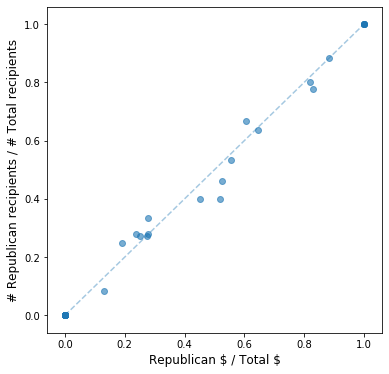

In [22]:
plt.figure(figsize = (6, 6))
plt.scatter(
    gave2_newest['r_amt:total'], 
    gave2_newest['r_count:total'], 
    alpha = 0.6, 
    
)
plt.plot(
    [0, max(gave2_newest['r_amt:total'].max(), gave2_newest['r_count:total'].max())], 
    [0, max(gave2_newest['r_amt:total'].max(), gave2_newest['r_count:total'].max())], 
    ls = '--',
    alpha = 0.4,
    
)
plt.xlabel('Republican \$ / Total \$', fontsize = 12)
plt.ylabel('# Republican recipients / # Total recipients', fontsize = 12)
plt.show();

In [23]:
for which in [0, 1]:
    print('proportion to R:', which, '\n')
    those = gave2_newest.loc[gave2_newest['r_amt:total'] == which, ['name', 'total']]
    print(those)
    print('\n')

proportion to R: 0 

                                                 name  total
1                         AL ADVISING (nonaffiliated)   4969
6                CAMPAIGN FINANCE SOLUTIONS (in-kind)    300
7                     CORNICHE TRAVEL GROUP (in-kind)   4445
8                           D STREET EVENTS (in-kind)   3608
9                          DAVEY CONSULTING (in-kind)   6500
10                                     DCCC (in-kind)  51369
12                            FAIRFIELD INN (in-kind)   3341
17                                 J STREET (in-kind)  40986
18            LEAGUE OF CONSERVATION VOTERS (in-kind)  13001
19                     MAPETSI POLICY GROUP (in-kind)    960
20                             MEDAWAR JILL (in-kind)    225
21                      NATIONAL CAR RENTAL (in-kind)   3198
22  NATIONAL RURAL ELECTRIC COOPERATIVE ASSOCIATIO...    540
23                            NCEC SERVICES (in-kind)  43000
24            PLANNED PARENTHOOD (umbrella) (in-kind)   9899
26 

In [24]:
cand.to_csv('data/04bii_cand_cleaned.csv', index = False)